# Zschool.py

In [79]:
import numpy as np
from scipy.stats import norm

mu_0 = 100
scsd = 4
mu_sc = 104
n = 40

IQschool = np.random.normal(mu_sc, scsd, n) # random sample
Zscore = (np.mean(IQschool) - mu_0)/(scsd/np.sqrt(len(IQschool)))
p_val  = 1 - norm.cdf(Zscore)
print("z-score = ",Zscore, " p=value = ", p_val)

z-score =  7.37183409950459  p=value =  8.415490526658687e-14


# tTestSchool.py

In [64]:
import numpy as np
from scipy.stats import ttest_1samp
from scipy.stats import t

IQ =  [110,105,97,104,98,112,115,108,90]
# t-test
onesample_results = ttest_1samp(IQ, 100) # calculate t-test
print("sample mean=",np.mean(IQ), " t = ", onesample_results[0], ", p-val = ", onesample_results[1])

# try t-test for another set
IQ2 =  [105,105,104,102,99,108,105,108,103]
# t-test
onesample_results = ttest_1samp(IQ2, 100)
print("sample mean=",np.mean(IQ2), " t = ", onesample_results[0], ", p-val = ", onesample_results[1])


sample mean= 104.33333333333333  t =  1.6155613916031184 , p-val =  0.14485212036124
sample mean= 104.33333333333333  t =  4.596194077712554 , p-val =  0.0017642106317483398


# twoSampleTtest.py

In [65]:
import numpy as np
from scipy.stats import ttest_ind

Treatment = np.array([94, 197, 16, 38, 99, 141, 23])
Control = np.array([52, 104, 146, 10, 51, 30, 40, 27, 46])

onesample_results  = ttest_ind(Treatment, Control)
print("sample means=(",np.mean(Treatment),",", np.mean(Control) ,")",
      " t = ", onesample_results[0], ", p-val = ", onesample_results[1])

sample means=( 86.85714285714286 , 56.22222222222222 )  t =  1.1208453991208167 , p-val =  0.2812125847953001


# BenfordLaw.py

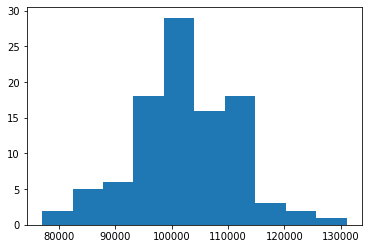

statistic =  242.29370969940368 p-value =  7.398996948156907e-48


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import chisquare

def first_n_digits(num, n):
    return num // 10 ** (int(math.log(num, 10)) - n + 1)

def BenfordTest(data):   
    plt.hist(data,bins=10)
    plt.show()
    expected = np.zeros(9)
    observed = np.zeros(9)    
    for i in range(9):
        expected[i] = np.log10(1 + (1/(i+1)))
    
    for num in data: 
        digit = int(first_n_digits(num,1))
        observed[digit - 1] = observed[digit - 1]+1    
    expected = expected*len(data)    
    result = chisquare(observed,expected)
    print("statistic = ",result[0],  "p-value = ",result[1])
    
    
np.random.seed(54321)
n = 100

data = np.random.normal(100000,10000,n)
BenfordTest(data)

# mousePermTest.py

In [67]:
import numpy as np
Treatment = np.array([94, 197, 16, 38, 99, 141, 23])
Control = np.array([52, 104, 146, 10, 51, 30, 40, 27, 46])

t_obs = np.abs(np.mean(Treatment) - np.mean(Control))

B = 1000

combined = np.append(Treatment,Control)

ell = np.zeros(B)

for i in range(0,B):
   tmp =  np.random.permutation(combined)
   t_tmp = tmp[0:Treatment.shape[0]]
   c_tmp = tmp[Treatment.shape[0]:combined.shape[0]]
   dif =  np.abs(np.mean(t_tmp) - np.mean(c_tmp))
   if(dif>t_obs):
       ell[i]=1
       
ell_mean = np.mean(ell)  
ell_std  = np.std(ell)  
print("p-val=",ell_mean, " p_value 95% CI = [",ell_mean - 1.96*ell_std/np.sqrt(B), 
                         " , ", ell_mean + 1.96*ell_std/np.sqrt(B),"]")  

p-val= 0.279  p_value 95% CI = [ 0.25120121559492214  ,  0.3067987844050779 ]


# exactmult.py

In [68]:
# exactmult.py
import numpy as np
from scipy.stats import chisquare
from math import factorial

# exact multinomial test
def GetProbUnderH0(observed, p_0):
    n = np.sum(observed)
    tmp = factorial(n)
    for i in range(len(p_0)):
        tmp = (tmp/factorial(observed[i]))*(np.power(p_0[i],observed[i]))
    return tmp

def ExactTest(observed, expected):
 
    N = 1000
    
    n = np.sum(observed)
    p_0 = expected/sum(expected)
    p_obs = GetProbUnderH0(observed, p_0)
    
    ell = np.zeros(N)
    
    for i in range(N):
        data = np.random.multinomial(n, p_0)
        res = GetProbUnderH0(data, p_0)
        if(res<=p_obs):
            ell[i]=1
    
    ell_mean = np.mean(ell)  
    ell_std  = np.std(ell)  
    print("Exact test: p-val=",ell_mean, " p_value 95% CI = [",ell_mean - 1.96*ell_std/np.sqrt(N), 
                             " , ", ell_mean + 1.96*ell_std/np.sqrt(N),"]")  



observed = np.array([30,20,10,10,10,10])
expected = np.array([10,10,10,20,30,40])

# chisquare
result = chisquare(observed,expected)
print("chisquare: statistic = ",result[0],  "p-value = ",result[1])
ExactTest(observed, expected)

print("-------------------------------------------------------")   
    
observed = np.array([3,2,1,1,1,1])
expected = np.array([1,1,1,2,3,4])

# chisquare
result = chisquare(observed,expected)
print("chisquare: statistic = ",result[0],  "p-value = ",result[1])
ExactTest(observed, expected)

chisquare: statistic =  90.83333333333333 p-value =  4.4899557840125596e-18
Exact test: p-val= 0.0  p_value 95% CI = [ 0.0  ,  0.0 ]
-------------------------------------------------------
chisquare: statistic =  9.083333333333332 p-value =  0.10578608167838381
Exact test: p-val= 0.035  p_value 95% CI = [ 0.023609212494300494  ,  0.04639078750569951 ]


# ecdf.py

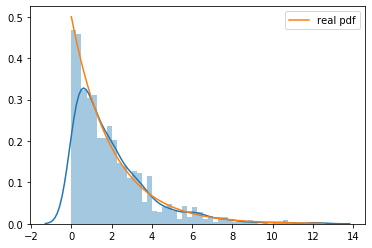

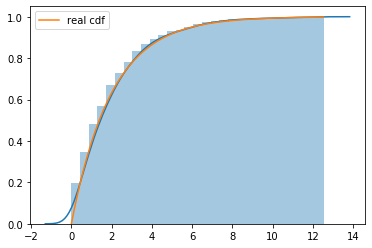

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
gamma = 0.5
samples = 1000
X = np.random.exponential(1/gamma,samples)
x = np.linspace(0,np.max(X),10000)
sns.distplot(X , bins = 50)
y = gamma*np.exp(-gamma*x)
plt.plot(x,y,label='real pdf')
plt.legend()
plt.show()
sns.distplot(X, hist_kws=dict
({'cumulative': True}),kde_kws=dict({'cumulative': True}))
# real cdf
y = 1 - np.exp(-gamma*x)
plt.plot(x,y,label='real cdf')
plt.legend()
plt.show()

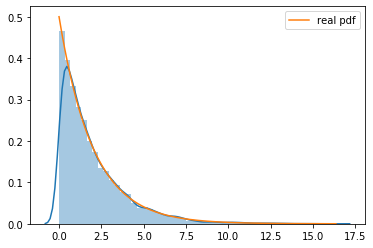

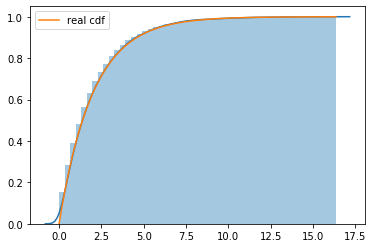

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
gamma = 0.5
samples = 10000
X = np.random.exponential(1/gamma,samples)
x = np.linspace(0,np.max(X),10000)
sns.distplot(X , bins = 50)
y = gamma*np.exp(-gamma*x)
plt.plot(x,y,label='real pdf')
plt.legend()
plt.show()
sns.distplot(X, hist_kws=dict
({'cumulative': True}),kde_kws=dict({'cumulative': True}))
# real cdf
y = 1 - np.exp(-gamma*x)
plt.plot(x,y,label='real cdf')
plt.legend()
plt.show()

# BootstrapExample.py

In [70]:
import numpy as np

np.random.seed(12345)

Treatment = np.array([94, 197, 16, 38, 99, 141, 23])
Control = np.array([52, 104, 146, 10, 51, 30, 40, 27, 46])

theta = np.mean(Treatment) - np.mean(Control)
#theta = np.median(Treatment) - np.median(Control)
#theta = np.max(Treatment) - np.max(Control)

N = 1000
ell = np.zeros(N)


for i in range(0,N):
    t_b = np.random.choice(Treatment, size=len(Treatment), replace=True)
    c_b = np.random.choice(Control, size=len(Control), replace=True)
    ell[i] = np.mean(t_b) - np.mean(c_b)
    #ell[i] = np.median(t_b) - np.median(c_b)
    #ell[i] = np.max(t_b) - np.max(c_b)
 
ell_mean = np.mean(ell)
ell_std = np.std(ell)

print("mean = ",theta, "CI = (",theta-1.96*ell_std , ", "
                                 ,theta+1.96*ell_std,")")

mean =  30.63492063492064 CI = ( -23.035443025407595 ,  84.30528429524887 )


# mousePermTestPHack.py

In [71]:
import numpy as np

def PermTest(Treatment, Control):
    t_obs = np.abs(np.mean(Treatment) - np.mean(Control))

    B = 10000
    
    combined = np.append(Treatment,Control)
    
    ell = np.zeros(B)
    
    for i in range(0,B):
       tmp =  np.random.permutation(combined)
       t_tmp = tmp[0:Treatment.shape[0]]
       c_tmp = tmp[Treatment.shape[0]:combined.shape[0]]
       dif =  np.abs(np.mean(t_tmp) - np.mean(c_tmp))
       if(dif>t_obs):
           ell[i]=1
           
    ell_mean = np.mean(ell)  
    ell_std  = np.std(ell)  
    print("p-val=",ell_mean, " p_value 95% CI = [",ell_mean - 1.96*ell_std/np.sqrt(B), 
                             " , ", ell_mean + 1.96*ell_std/np.sqrt(B),"]")  


Treatment = np.array([94, 197, 16, 38, 99, 141, 23])
Control = np.array([52, 104, 146, 10, 51, 30, 40, 27, 46])
t_obs = np.abs(np.mean(Treatment) - np.mean(Control))
PermTest(Treatment, Control)

# The management feels that the variance in the Treatment group
# is too big. Using small adjustments, we repet the experiment to obtain

Treatment2 = np.array([73, 69, 115, 110, 90, 75, 80, 100, 77,83, 68,97])
t_obs2 = np.abs(np.mean(Treatment2) - np.mean(Control))

print("The new differences in the observed statistic is ",t_obs2-t_obs)

PermTest(Treatment2, Control)

p-val= 0.2746  p_value 95% CI = [ 0.2658522751681137  ,  0.2833477248318863 ]
The new differences in the observed statistic is  -0.4404761904761898
p-val= 0.0326  p_value 95% CI = [ 0.02911928942335045  ,  0.03608071057664954 ]


# coins1.py

In [72]:
import numpy as np
from numpy.random import randint
from scipy import stats
import pandas as pd

np.random.seed(12345)

color = ['Purple', 'Brown', 'Pink', 'Blue', 'Teal', 
        'Salmon', 'Red', 'Turquoise', 'Magenta', 'Yellow', 
        'Tan', 'Green',  'Grey',  'Cyan',  'Mauve',
        'Beige', 'Lilac', 'Black', 'Peach', 'Orange']

# number of experiments
n = 100 


df = pd.DataFrame(index=color)
for col in color:
    result = randint(0,1+1,n)
    df.loc[col,'Heads'] = np.sum(result)
  
tmp = df[df["Heads"]==max(df["Heads"])]
      
num_heads = tmp.values[0][0]

# 1-cdf
p_value = stats.binom(100, 1/2).sf(num_heads)

print("p-value = ",p_value)

p-value =  0.04431304005703377


# coins2.py

In [73]:
import numpy as np
from numpy.random import randint
from scipy import stats
import pandas as pd

np.random.seed(12345)

N = 100000
ell = np.zeros(N)

for i in range(N):
    exp = np.random.binomial(100,0.5,20)
    if(max(exp)>=58):
        ell[i]=1
        
print(np.mean(ell))

0.74869
